In [1]:
import numpy as np
from matplotlib import pyplot as plt
import csv
import pandas as pd

In [2]:
def load_dataset_csv(data_path):
    with open(data_path, newline="") as f:
        csv_reader = csv.reader(f)

        next(csv_reader)

        X = []
        y = []

        for row in csv_reader:
            X.append(row[0])
            y.append(row[1])

    X = np.array(X, dtype=float)
    y = np.array(y, dtype=float)

    return X, y

In [13]:
def polynomial_regression(X, y, n):
    # Erstellen der Design-Matrix (Vandermonde-Matrix) für die Polynomregression
    X_poly = np.vander(X, N=n+1, increasing=False)
    
    # Berechnung der Gewichte w mit der Least-Squares-Methode
    # w = (X_poly^T * X_poly)^(-1) * X_poly^T * y
    w = np.linalg.lstsq(X_poly, y, rcond=None)[0]
    
    return w

In [14]:
def kfold_crossval(X, y, n, k=10):
    # Anzahl der Datenpunkte
    num_samples = len(X)
    
    # Zufälliges Mischen der Indizes (ohne die Reihenfolge der Daten zu ändern)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    
    # Aufteilen der Indizes in k gleich große Teile (Folds)
    folds = np.array_split(indices, k)
    
    mse_list = []  # Liste zur Speicherung der MSE-Werte für jede Falidierung
    
    # Kreuzvalidierungsschleife
    for fold in folds:
        # Indizes für das Validierungsset und Trainingsset
        validation_idx = fold
        train_idx = np.setdiff1d(indices, validation_idx)
        
        # Aufteilen der Daten in Trainings- und Validierungssets
        X_train, y_train = X[train_idx], y[train_idx]
        X_validation, y_validation = X[validation_idx], y[validation_idx]
        
        # Trainieren des Modells mit dem Trainingsset
        w = polynomial_regression(X_train, y_train, n)
        
        # Vorhersagen für das Validierungsset
        X_validation_poly = np.vander(X_validation, N=n+1, increasing=False)
        y_pred = X_validation_poly @ w
        
        # Berechnung des Mean Squared Error (MSE) für das Validierungsset
        mse = np.mean((y_validation - y_pred) ** 2)
        mse_list.append(mse)
    
    # Durchschnittlicher Validierungsfehler
    mean_mse = np.mean(mse_list)
    return mean_mse

In [15]:
def find_best_poly_model(X, y, n=9):

    best_degree = None
    best_mse = float('inf')

    # Test each degree from 0 to n

    for degree in range(n + 1):

        mse = kfold_crossval(X, y, degree)
        if mse < best_mse:
            best_mse = mse
            best_degree = degree

    return best_degree

In [4]:
def plot(X, y, w):
    """
    This function plots 2D data assuming a linear model with
    polynomial basis functions. The weights have to be provided
    in ascending order of the degree of the polynomials.
    
    Parameters:
    - X: A 1D array of input values (independent variable).
    - y: A 1D array of output values (dependent variable).
    - w: A 1D array of weights for the polynomial model, ordered
         by the degree of the polynomial terms.
    """

    # Plot the data points
    plt.scatter(X, y, color='blue', label='Data Points')

    # Generate input values for the x data range
    x_range = np.linspace(min(X), max(X), 100)
    
    # Compute the function values using the weights
    y_range = np.zeros_like(x_range)
    for degree, weight in enumerate(w):
        y_range += weight * (x_range ** degree)

    # Plot the regression model
    plt.plot(x_range, y_range, color='red', label='Regression Model')

    # Add labels and a legend
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title('2D Data and Polynomial Regression Model')
    plt.show()

In [19]:
def load_data(name, m=None, rng=None):
    # Use np.genfromtxt or np.loadtxt for CSV files
    data = np.genfromtxt(name, delimiter=',')
    x = data[:, :-1]
    y = data[:, -1]
    
    return x, y

# Load datasets
datasets = {f"./dataset{i}.csv": load_data(f"./dataset{i}.csv") for i in range(3)}

In [17]:
# TODO
# Visualize dataset
# Find best degree polynomial
# fit whole dataset
# look at results

def visualize_data(X, y, title="Dataset"):
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(title)
    plt.legend()
    plt.show()

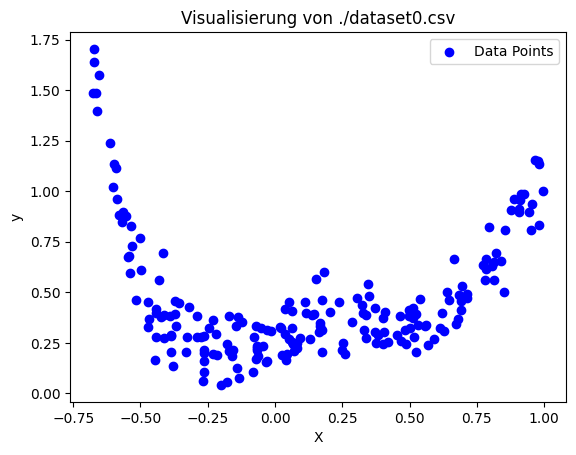

ValueError: x must be a one-dimensional array or sequence.

In [21]:
for dataset_name, (X, y) in datasets.items():
    # Visualisiere den Datensatz
    visualize_data(X, y, title=f"Visualisierung von {dataset_name}")

    # Finde den besten Grad des Polynoms
    best_degree = find_best_poly_model(X, y)
    print(f"Der beste Polynomgrad für {dataset_name} ist: {best_degree}")

    # Passe das Polynom an die gesamten Daten an
    w = polynomial_regression(X, y, best_degree)
    print(f"Die Parameter des besten Polynoms: {w}")

    # Visualisiere die angepasste Funktion
    X_fit = np.linspace(min(X), max(X), 1000)
    X_fit_poly = np.vander(X_fit, N=best_degree + 1, increasing=False)
    y_fit = X_fit_poly @ w

    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X_fit, y_fit, color='red', label=f"Best Fit Polynomial (n={best_degree})")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(f"Polynomiale Anpassung für {dataset_name}")
    plt.legend()
    plt.show()

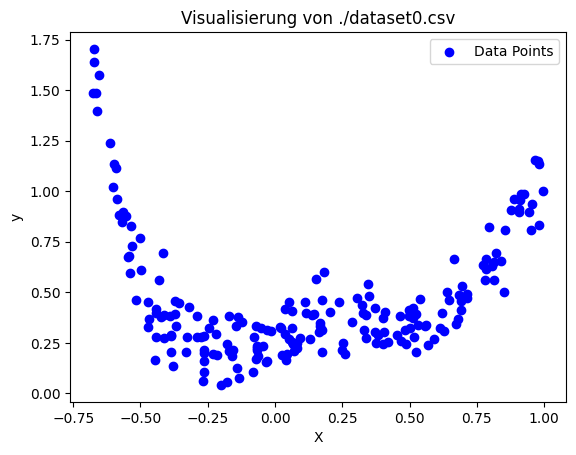

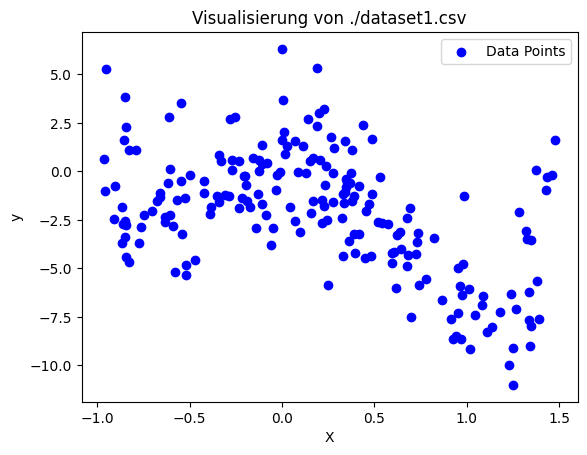

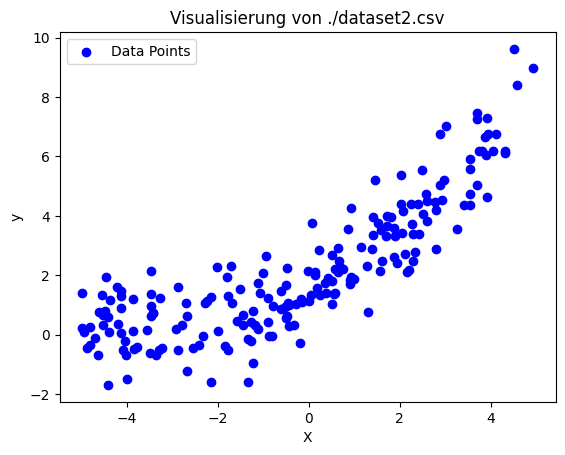

In [20]:
for dataset_name, (X, y) in datasets.items():
    # Visualisiere den Datensatz
    visualize_data(X, y, title=f"Visualisierung von {dataset_name}")